## Computer Lab: Digit recognition - SD-TSIA 211 ##

### Done by : Adnane El Bouhali ###

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

5


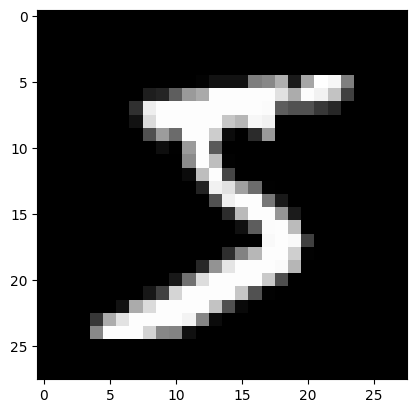

In [10]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')

In [11]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#def loss(true, pred):
#    val = 0.
#    for i in range(len(true)):
#        val -= np.log(pred[i, true[i]])
#    return val / len(true)
model.summary()

Model: "mnist_model"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# untrained model
logits = model(x_train)
np.argmax(logits, 1)[0:100]

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 9, 2, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 9, 9, 9, 9, 9,
       9, 3, 9, 9, 9, 9, 9, 9, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 9,
       3, 9, 9, 9, 9, 9, 9, 9, 9, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=int64)

In [13]:
# what we would like to get
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [14]:
## Computing a stochastic gradient

# Source: https://keras.io/guides/writing_a_training_loop_from_scratch/

# Example of gradient computation using automatic differentiation

x_train_batch = x_train[:8]
y_train_batch = y_train[:8]
with tf.GradientTape() as tape:
        # Run the forward pass of the layer.
        # The operations that the layer applies
        # to its inputs are going to be recorded
        # on the GradientTape.
        logits = model(x_train_batch)  # Logits for this minibatch

        # Compute the loss value for this minibatch.
        loss_value = loss(y_train_batch, logits)

# Use the gradient tape to automatically retrieve
# the gradients of the trainable variables with respect to the loss.
grad = tape.gradient(loss_value, model.trainable_weights)

## Updating weights

def update_weights(model, update):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] + update[i]
    model.set_weights(new_weights)


## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
loss(y_train[samples_for_evaluation], logits).numpy()
    

2.3832967

**Question 4.1 : How many optimization variables are we going to train using this model?**

In [15]:
optim_variables = model.count_params()
print("Total number of optimization variables :", optim_variables)

Total number of optimization variables : 26506


The count of optimization variables equals the sum of weights and biases within the model, incorporating three neuron layers: depth 1, depth 2, and prediction. Each layer facilitates connections from a certain number of neurons to another, focusing on the total number of optimization coefficients, essentially the count of connections spanning layers between two neurons, in addition to the biases situated on the nodes. While biases are more straightforward to adjust, their function diverges from that of the other weights.

The calculation unfolds as follows: $(784 \times 32 + 32) + (32 \times 32 + 32) + (32 \times 10 + 10) = 26506$ neurons, as previously highlighted in the network summary cell.

**Question 5.1 : Reusing the code provided in the basic functions file, implement stochastic gradient descent for the resolution of the neural network model.**

**Question 5.2 : Run it for one pass over the data (also called one epoch) and with a learning rate that satisfies the conditions required by theory. Plot the objective value as a function of the iterations.**


Start of epoch 0
Training loss (for one batch) at step 0: 2.5323
Seen so far: 1 samples
Training loss (for one batch) at step 100: 3.4712
Seen so far: 101 samples
Training loss (for one batch) at step 200: 1.9489
Seen so far: 201 samples
Training loss (for one batch) at step 300: 1.4459
Seen so far: 301 samples
Training loss (for one batch) at step 400: 1.4912
Seen so far: 401 samples
Training loss (for one batch) at step 500: 1.7843
Seen so far: 501 samples
Training loss (for one batch) at step 600: 0.0874
Seen so far: 601 samples
Training loss (for one batch) at step 700: 2.3565
Seen so far: 701 samples
Training loss (for one batch) at step 800: 2.4902
Seen so far: 801 samples
Training loss (for one batch) at step 900: 0.8430
Seen so far: 901 samples
Training loss (for one batch) at step 1000: 0.0746
Seen so far: 1001 samples
Training loss (for one batch) at step 1100: 0.0245
Seen so far: 1101 samples
Training loss (for one batch) at step 1200: 0.4516
Seen so far: 1201 samples
Train

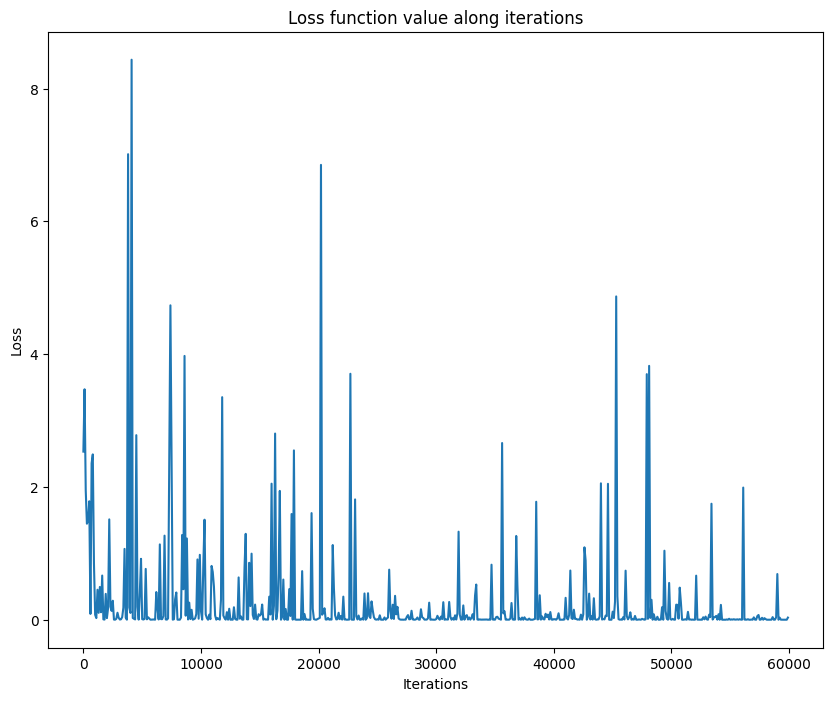

In [16]:
batch_size = 1
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

lr = 0.01
step_list = []
loss_list = []

epochs = 1 # training epochs
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:
            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights) # length 6, in line with trainable_weights

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        # optimizer.apply_gradients(zip(grads, model.trainable_weights))
        update_item = list()
        for i in range(len(grads)):
            update_item.append(-lr * grads[i])
        update_weights(model, update_item)

        # Log every 400 batches.
        if step % 100 == 0:
            step_list.append(step)
            loss_list.append(float(loss_value))
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))
plt.figure(figsize=(10,8))
plt.plot(step_list, loss_list)
plt.title("Loss function value along iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

**Question 6.1 : Implement stochastic gradient descent for the resolution of the empirical risk minimization problem and run it for 10 epochs.**

In [17]:
# reset model
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs) # relu: non linear, weight: 784*32
x = layers.Dense(32, activation="relu", name="dense_2")(x) # fully connected layers, calculating the weights between the nodes, weight: 32*32
outputs = layers.Dense(10, activation=None, name="predictions")(x) # output results of size 10
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#def loss(true, pred):
#    val = 0.
#    for i in range(len(true)):
#        val -= np.log(pred[i, true[i]])
#    return val / len(true)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Start of epoch 0
Training loss (for one batch) at step 0: 2.2892
Seen so far: 64 samples
Training loss (for one batch) at step 400: 2.2387
Seen so far: 25664 samples
Training loss (for one batch) at step 800: 2.1717
Seen so far: 51264 samples

Start of epoch 1
Training loss (for one batch) at step 0: 2.0860
Seen so far: 64 samples
Training loss (for one batch) at step 400: 2.0406
Seen so far: 25664 samples
Training loss (for one batch) at step 800: 1.8955
Seen so far: 51264 samples

Start of epoch 2
Training loss (for one batch) at step 0: 1.7401
Seen so far: 64 samples
Training loss (for one batch) at step 400: 1.7366
Seen so far: 25664 samples
Training loss (for one batch) at step 800: 1.4878
Seen so far: 51264 samples

Start of epoch 3
Training loss (for one batch) at step 0: 1.5210
Seen so far: 64 samples
Training loss (for one batch) at step 400: 1.4189
Seen so far: 25664 samples
Training loss (for one batch) at step 800: 1.2049
Seen so far: 51264 samples

Start of epoch 4
Traini

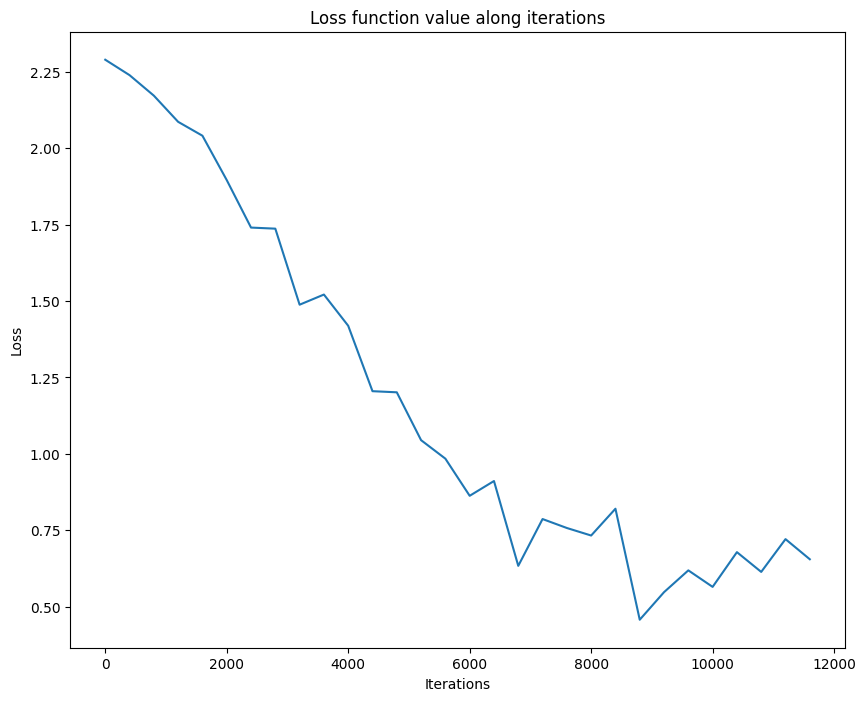

In [18]:
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

lr = 0.001
step_list = []
loss_list = []

epochs = 10 # training epochs
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:
            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights) # length 6, in line with trainable_weights

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        # optimizer.apply_gradients(zip(grads, model.trainable_weights))
        update_item = list()
        for i in range(len(grads)):
            update_item.append(-lr * grads[i])
        update_weights(model, update_item)

        # Log every 400 batches.
        if step % 400 == 0:
            step_list.append(step)
            loss_list.append(float(loss_value))
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))
plt.figure(figsize=(10,8))
plt.plot([400*k for k in range(len(loss_list))], loss_list)
plt.title("Loss function value along iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

**Question 6.2 : According to you, what is the advantage of such a scheme?**

When we use batches in machine learning, it helps the learning process become smoother and more reliable. Imagine you're trying to find the best path down a mountain in thick fog; using batches is like getting advice from several friends at once, each standing at different points on the mountain, rather than just one friend. This way, you get a better idea of which way to go because the advice is averaged out, making it less likely to be wrong due to someone standing in a particularly tricky spot (this is like reducing the noise in the data). This method is especially good when our data has a lot of random messiness (noise) or when we have so much data that looking at it all at once would take too much time and computing power. Also, by using batches, we can make calculations faster and more efficiently because computers can work on multiple pieces of the batch at the same time, just like a team of cooks in a kitchen working on different parts of a meal together.

**Question 6.3 : Add the option of the batch size to your algorithm.**

In [19]:
# reset model
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs) 
x = layers.Dense(32, activation="relu", name="dense_2")(x) 
outputs = layers.Dense(10, activation=None, name="predictions")(x) 
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

lr = 0.01
step_list = []
loss_list = []


Start of epoch 0
Training loss (for one batch) at step 0: 2.4085
Seen so far: 64 samples
Training loss (for one batch) at step 200: 2.3607
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 2.3724
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 2.3395
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 2.3476
Seen so far: 51264 samples

Start of epoch 1
Training loss (for one batch) at step 0: 2.3432
Seen so far: 64 samples
Training loss (for one batch) at step 200: 2.3074
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 2.2922
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 2.3123
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 2.2976
Seen so far: 51264 samples

Start of epoch 2
Training loss (for one batch) at step 0: 2.3129
Seen so far: 64 samples
Training loss (for one batch) at step 200: 2.2778
Seen so far: 12864 samples
Training loss (for one batch) at step

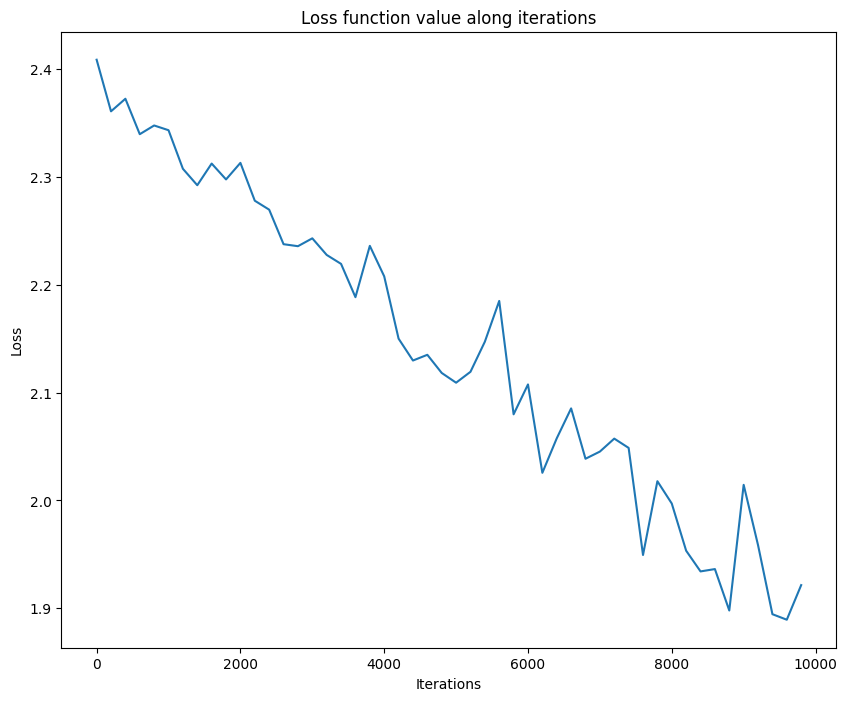

In [21]:
epochs = 10 # training epochs
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:
            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights) # length 6, in line with trainable_weights

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        # optimizer.apply_gradients(zip(grads, model.trainable_weights))
        update_item = list()
        for i in range(len(grads)):
            update_item.append(-lr * 1/batch_size * grads[i])
        update_weights(model, update_item)

        # Log every 400 batches.
        if step % 200 == 0:
            step_list.append(step)
            loss_list.append(float(loss_value))
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))
plt.figure(figsize=(10,8))
plt.plot([200*k for k in range(len(loss_list))], loss_list)
plt.title("Loss function value along iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

**Question 7.1 : Evaluate the accuracy of the model on the training set and on the test set.**

In [25]:
logits = model(x_train)
y_train_hat = np.argmax(logits, 1) 
train_acc = (y_train_hat == y_train).sum()/y_train.shape[0]
x_test = test_data[0].reshape(-1,784).astype(float) / 255
y_test = test_data[1]
logits = model(x_test)
y_test_hat = np.argmax(logits, 1)
test_acc = (y_test_hat == y_test).sum()/y_test.shape[0]
print("Training accuracy: %.3f, Test accuracy: %.3f" % (float(train_acc), float(test_acc)))

Training accuracy: 0.460, Test accuracy: 0.461
